In [1]:
# Import libraries
import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "../data/encoded/housing_market/"
csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
dfs = [pd.read_csv(f, low_memory=False) for f in csv_files]
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.to_csv("../data/encoded/housing_market_japan.csv", index=False)
print('Merge Completed!')

Merge Completed!


In [3]:
df = pd.read_csv("../data/encoded/housing_market_japan.csv", low_memory=False)
df.head()

,Type,Price information classification,Area,"City,Town,Ward,Village code",Prefecture,"City,Town,Ward,Village",District,Nearest station : Name,Nearest station : Distance,Total transaction value,...,Purpose of use,Frontage road : Direction,Frontage road : Type,Frontage road : Width,City planning,Building coverage ratio,Floor area ratio,Transaction timing,Renovation,Transaction factors
0,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,28101,Hyogo Prefecture,"Higashinada Ward, Kobe City",Uzumoridai,Sumiyoshi(JR/Rokkoliner),NaN,3000000,...,NaN,NaN,NaN,NaN,1 Exc Med,NaN,NaN,1st quarter 2021,NaN,NaN
1,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,28101,Hyogo Prefecture,"Higashinada Ward, Kobe City",Uzumoridai,Sumiyoshi(JR/Rokkoliner),NaN,4500000,...,NaN,NaN,NaN,NaN,1 Exc Med,NaN,NaN,1st quarter 2021,NaN,NaN
2,Residential Land(Land and Building),Contract Price Information,NaN,28101,Hyogo Prefecture,"Higashinada Ward, Kobe City",Okamoto,Okamoto(Hyogo),15,38000000,...,NaN,East,Public Road,4.0,1 Exc Low,40.0,80.0,1st quarter 2021,NaN,NaN
3,"Pre-owned Condominiums, etc.",Contract Price Information,NaN,28101,Hyogo Prefecture,"Higashinada Ward, Kobe City",Okamoto,Settsu Motoyama,1,9200000,...,NaN,NaN,NaN,NaN,Neighborhood Comm,NaN,NaN,1st quarter 2021,NaN,NaN
4,Residential Land(Land and Building),Contract Price Information,NaN,28101,Hyogo Prefecture,"Higashinada Ward, Kobe City",Okamoto,Okamoto(Hyogo),15,72000000,...,NaN,North,Public Road,6.0,1 Exc Low,40.0,80.0,1st quarter 2021,NaN,NaN


In [4]:
df.columns

Index(['Type', 'Price information classification', 'Area',
       'City,Town,Ward,Village code', 'Prefecture', 'City,Town,Ward,Village',
       'District', 'Nearest station : Name', 'Nearest station : Distance',
       'Total transaction value', 'Layout', 'Area(‡u)', 'Land : Price per ‡u',
       'Land : Shape', 'Frontage', 'Building : Total floor area',
       'Building : Construction year', 'Building : Structure', 'Use',
       'Purpose of use', 'Frontage road : Direction', 'Frontage road : Type',
       'Frontage road : Width', 'City planning', 'Building coverage ratio',
       'Floor area ratio', 'Transaction timing', 'Renovation',
       'Transaction factors'],
      dtype='object')

In [5]:
# Fixed column names with unreadable characters (‡u), renaming them to "m²"
df.rename(columns={"Area(‡u)": "Area(m²)", "Land : Price per ‡u": "Land : Price per m²"}, inplace=True)

In [6]:
len(df)

5897242

# Data Filtering

## Analysis of `Type`

In [7]:
df['Type'].unique()

array(['Pre-owned Condominiums, etc.',
       'Residential Land(Land and Building)',
       'Residential Land(Land Only)', 'Forest Land', 'Agricultural Land'],
      dtype=object)

### Description
This dataset includes various types of land and properties, but only `Residential Land (Land and Building)` is retained.  

#### **Reason for removal of other categories:**  
- `Pre-owned Condominiums, etc.` → Excluded as condominiums follow different market dynamics.  
- `Residential Land (Land Only)` → Excluded since vacant land does not include building costs.  
- `Forest Land` & `Agricultural Land` → Excluded as they are irrelevant to the housing market.  

**→ The dataset now focuses only on residential properties with both land and buildings.**


In [8]:
df = df[df["Type"] == "Residential Land(Land and Building)"]
df.drop(columns=["Type"], inplace=True) 

## Analysis of `Price information classification`

In [9]:
df["Price information classification"].unique()

array(['Contract Price Information',
       'Real Estate Transaction Price Information'], dtype=object)

In [10]:
df.groupby("Price information classification")["Total transaction value"].describe()

,count,mean,std,min,25%,50%,75%,max
Price information classification,,,,,,,,
Contract Price Information,161910.0,2.968836e+07,2.173824e+07,1000000.0,17000000.0,27000000.0,37000000.0,1.400000e+09
Real Estate Transaction Price Information,1998331.0,4.134878e+07,2.231876e+08,100.0,11000000.0,24000000.0,38000000.0,1.700000e+11


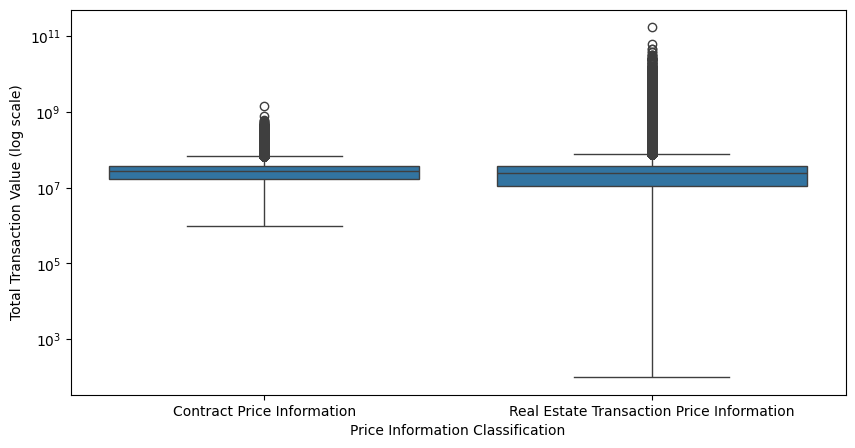

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Price information classification", y="Total transaction value")
plt.yscale("log")
plt.xlabel("Price Information Classification")
plt.ylabel("Total Transaction Value (log scale)")
plt.show()

### Description

The table above shows the statistical summary of transaction values for each price classification after filtering by property type.  

- `Contract Price Information` and `Real Estate Transaction Price Information` have **similar median values**, but `Real Estate Transaction Price Information` exhibits greater variability.  
- The **minimum value for `Real Estate Transaction Price Information` is extremely low (100 JPY)**, suggesting the presence of unrealistic or erroneous transactions.  
- The **standard deviation for `Real Estate Transaction Price Information` is significantly larger**, indicating a wider range of transaction values.  

The boxplot below visualizes these differences:  
- `Contract Price Information` (blue) has a **narrower distribution**, with fewer extreme values.  
- `Real Estate Transaction Price Information` (orange) **shows a broader spread**, including significantly lower transactions.  

**→ `Contract Price Information` reflects contract values rather than actual transaction prices.**  
**To maintain consistency in market analysis, only `Real Estate Transaction Price Information` will be used.**  

In [12]:
df = df[df["Price information classification"] == "Real Estate Transaction Price Information"]
df.drop(columns=["Price information classification"], inplace=True)

## Analysis of `Area`

In [13]:
df["Area"].unique()

array(['Residential Area', 'Commercial Area', 'Industrial Area',
       'Potential Residential Area'], dtype=object)

### Description

This dataset includes different types of areas, but only `Residential Area` is retained.  

#### **Reason for removal of other categories:**  
- **`Commercial Area`** → Excluded since commercial properties follow different pricing and demand dynamics.  
- **`Industrial Area`** → Excluded as industrial zones are not relevant to residential housing prices.  
- **`Potential Residential Area`** → Excluded because these areas may not yet have established housing markets or infrastructure.  

**→ The dataset now focuses only on established residential areas to ensure accurate housing market analysis.**


In [14]:
df = df[df["Area"] == "Residential Area"]
df.drop(columns=["Area"], inplace=True)  

## Analysis of `City,Town,Ward,Village code`

In [15]:
df["City,Town,Ward,Village code"].unique()

array([28101, 28102, 28105, ...,  6426,  6428,  6461], shape=(1887,))

### Description

This column contains numerical codes assigned to cities, towns, wards, and villages.  
In this analysis, data will be grouped at the **prefecture level** rather than the city level.  
- Grouping at the city level would make the analysis too granular and may lead to insufficient data in some regions.  
- Since the `Prefecture` column already provides location information, this code is unnecessary.  

**→ This column will be removed as it is not needed for the prefecture-level analysis.**

In [16]:
df.drop(columns=["City,Town,Ward,Village code"], inplace=True)

## Analysis of `Prefecture`

In [17]:
df["Prefecture"].unique()

array(['Hyogo Prefecture', 'Ibaraki Prefecture', 'Tokushima Prefecture',
       'Aichi Prefecture', 'Ehime Prefecture', 'Niigata Prefecture',
       'Saitama Prefecture', 'Miyagi Prefecture', 'Kyoto Prefecture',
       'Saga Prefecture', 'Okayama Prefecture', 'Wakayama Prefecture',
       'Kochi Prefecture', 'Miyazaki Prefecture', 'Aomori Prefecture',
       'Tottori Prefecture', 'Osaka Prefecture', 'Mie Prefecture',
       'Oita Prefecture', 'Okinawa Prefecture', 'Shizuoka Prefecture',
       'Gifu Prefecture', 'Chiba Prefecture', 'Nara Prefecture',
       'Shiga Prefecture', 'Kagoshima Prefecture', 'Gunma Prefecture',
       'Toyama Prefecture', 'Hiroshima Prefecture', 'Shimane Prefecture',
       'Fukuoka Prefecture', 'Nagasaki Prefecture', 'Tokyo', 'Hokkaido',
       'Fukushima Prefecture', 'Yamaguchi Prefecture',
       'Nagano Prefecture', 'Ishikawa Prefecture', 'Yamanashi Prefecture',
       'Iwate Prefecture', 'Tochigi Prefecture', 'Fukui Prefecture',
       'Kumamoto Prefectur

### Description

This column represents the prefecture names in Japan.  
It is essential for **grouping and analyzing housing prices at the prefecture level**.  

#### **Points to consider:**
- The naming format is inconsistent: some entries include `"Prefecture"` (e.g., `"Hyogo Prefecture"`), while others do not (e.g., `"Tokyo"`, `"Hokkaido"`).
- **To maintain consistency, all entries should follow the same format** (either with or without `"Prefecture"`).
- Prefectures will be used for grouping and market price analysis.

**→ The naming format will be standardized to ensure consistency in analysis.**

In [18]:
# Standardizing prefecture names by ensuring all entries either include or exclude "Prefecture"
df["Prefecture"] = df["Prefecture"].str.replace(" Prefecture", "", regex=False)  # Removing " Prefecture" for consistency

## Analysis of `City,Town,Ward,Village`

In [19]:
df["City,Town,Ward,Village"].unique()

array(['Higashinada Ward, Kobe City', 'Nada Ward, Kobe City',
       'Hyogo Ward, Kobe City', ..., 'Mikawa Town, Higashitagawa County',
       'Shonai Town, Higashitagawa County', 'Yuza Town, Akumi County'],
      shape=(1873,), dtype=object)

### Description

This column represents the specific municipality within each prefecture, including cities, towns, wards, and villages.  

#### **Points to consider:**
- The analysis is conducted at the **prefecture level**, not the city/town level.  
- **Keeping this column would make the grouping too granular**, leading to smaller data subsets that may lack statistical significance.  
- **Prefecture-level grouping provides a clearer overall market trend**, while city-level grouping could fragment the data too much.  

**→ This column will be removed as the analysis focuses on the prefecture level.**

In [20]:
df.drop(columns=["City,Town,Ward,Village"], inplace=True)

## Analysis of `District`

In [21]:
df["District"].unique()

array(['Uozakikitamachi', 'Uozakinakamachi', 'Uozakinishimachi', ...,
       'Hiko', 'Oharada', 'Eji'], shape=(56462,), dtype=object)

### Description

This column represents smaller subdivisions within cities, such as districts or neighborhoods.  

#### **Points to consider:**
- The analysis is conducted at the **prefecture level**, not at the district or neighborhood level.  
- **Keeping this column would make the data too fragmented**, reducing the statistical significance of regional trends.  
- **Prefecture-level grouping is sufficient for understanding market trends**, while district-level analysis would require a different approach with more granular data.  

**→ This column will be removed as the analysis focuses on the prefecture level.**


In [22]:
df.drop(columns=["District"], inplace=True)

## Analysis of `Nearest station : Name`

In [23]:
df["Nearest station : Name"].unique()

array(['Uozaki', 'Ogi(Hyogo)', 'Sumiyoshi(JR/Rokkoliner)', ..., 'Fukura',
       'Yuza', 'Mega(Yamagata)'], shape=(8255,), dtype=object)

### Description

This column represents the name of the nearest train or subway station for each property.  

#### **Points to consider:**
- **Proximity to public transportation is a key factor in real estate prices**, so this column may be useful.  
- However, **station names alone are not numerically analyzable** and would require additional processing (e.g., categorization or distance-based grouping).  
- **Instead of using station names directly, analyzing `Nearest station : Distance` might be more effective** for measuring accessibility.

**→ This column will be removed unless station names are explicitly needed for analysis.**


In [24]:
df.drop(columns=["Nearest station : Name"], inplace=True)

## Analysis of `Nearest station : Distance`

In [25]:
df["Nearest station : Distance"].unique()

array(['8', '14', '10', '13', '6', '11', '9', '12', '5', '2', '7', '4',
       '3', '26', '24', '30-60minutes', '29', '23', '25', '15', '18',
       '16', '19', '28', '1', '20', '21', nan, '17', '2H-', '1H30-2H',
       '1H-1H30', '27', '0', '22'], dtype=object)

### Description

This column represents the walking distance to the nearest train or subway station.  

- Values are a mix of **numeric minutes and categorical ranges** (e.g., `"30-60minutes"`, `"2H-"`).  
- **Categorizing distances** into meaningful groups improves consistency and allows better price correlation analysis.  
- **Converted into five categories**: `"Very Close"`, `"Close"`, `"Moderate"`, `"Far"`, `"Very Far"`.  

**→ The original column is replaced with a categorized version for better analysis.**


In [26]:
# Converting 'Nearest station : Distance' into categories
def categorize_distance(value):
    if pd.isna(value):  # Keep NaN values
        return np.nan
    elif isinstance(value, str) and "-" in value:
        return "Very Far"
    else:
        value = int(value)  # Convert to integer if numeric
        if value <= 5:
            return "Very Close"
        elif value <= 10:
            return "Close"
        elif value <= 20:
            return "Moderate"
        elif value <= 30:
            return "Far"
        else:
            return "Very Far"

df["Station Distance Category"] = df["Nearest station : Distance"].apply(categorize_distance)
df.drop(columns=["Nearest station : Distance"], inplace=True)  # Remove original column if necessary


## Analysis of `Total transaction value`

### Description

This column represents the total transaction value of each real estate transaction.  

- **One of the most important variables** in the analysis, as it directly reflects market prices.  
- **Continuous numeric data**, essential for calculating averages and identifying price trends.  
- **Will be retained as a key feature** for market analysis and price estimation.  


## Analysis of `Layout`

In [27]:
df["Layout"].unique()

array([nan], dtype=object)

In [28]:
df["Layout"].isna().sum(), len(df)

(np.int64(1824496), 1824496)

### Description

This column represents the layout of the property (e.g., "3LDK", "2DK").  

- During the data processing steps, **all rows containing `Layout` values were removed** due to filtering conditions.  
- As a result, `Layout` is now entirely empty (`NaN` for all records).  
- **Since no remaining rows contain valid `Layout` data, this column will be removed.**  


In [29]:
df.drop(columns=["Layout"], inplace=True)

## Analysis of `Area(m²)`

In [30]:
df["Area(m²)"].unique()

array(['55', '600', '75', '110', '65', '180', '60', '50', '85', '130',
       '115', '125', '45', '300', '160', '40', '270', '560', '410', '390',
       '430', '80', '90', '100', '105', '70', '95', '530', '210', '150',
       '610', '250', '140', '195', '190', '1300', '135', '340', '120',
       '220', '290', '165', '990', '240', '370', '360', '260', '145',
       '200', '440', '280', '170', '30', '175', '185', '470', '1400',
       '460', '1000', '1200', '510', '320', '500', '590', '550', '480',
       '450', '330', '680', '35', '1100', '155', '710', '780', '230',
       '420', '310', '520', '570', '2,000 ‡u or greater.', '350', '1500',
       '380', '490', '730', '400', '860', '620', '1800', '740', '630',
       '890', '830', '810', '800', '1600', '790', '770', '1900', '540',
       '640', '920', '670', '690', '650', '1700', '660', '930', '870',
       '580', '900', '880', '700', '760', '750', '940', '25', '15', '950',
       '910', '720', '980', '20', '960', '970', '850', '820', '84

### Description

This column represents the total floor area of the property in square meters (m²).  

- **A wide range of values**, from **as low as 10 m² to over 2,000 m²**, indicates a mix of different property types.  
- **Extremely large values (e.g., "2,000 ‡u or greater.") require cleaning and categorization.**  
- **Area will be categorized into meaningful size groups** to facilitate price analysis.  
- **Urban and rural areas have different typical sizes, but a nationwide categorization will be used.**  

**→ The original numeric values are replaced with categorical groups for better analysis.**


In [31]:
def categorize_area(area):
    if pd.isna(area):
        return np.nan
    area = float(area.replace(",", "").split()[0]) if isinstance(area, str) else area  # 文字列処理
    if area <= 30:
        return "Very Small"
    elif area <= 60:
        return "Small"
    elif area <= 100:
        return "Medium"
    elif area <= 200:
        return "Large"
    else:
        return "Very Large"

df["Area Category"] = df["Area(m²)"].apply(categorize_area)
df.drop(columns=["Area(m²)"], inplace=True)

## Analysis of `Land : Price per m²`

In [32]:
df["Land : Price per m²"].unique()

array([nan])

### Description

This column represents the price of land per square meter (m²).  

- **All values have been removed during previous processing steps.**  
- **Since no valid data remains in this column, it will be removed.**  


In [33]:
df.drop(columns=["Land : Price per m²"], inplace=True)

## Analysis of `Land : Shape`

In [34]:
df["Land : Shape"].unique()

array(['Semi-rectangular Shaped', 'Irregular Shaped',
       'Rectangular Shaped', 'Semi-trapezoidal Shaped',
       'Semi-square Shaped', 'Semi-shaped', 'Trapezoidal Shaped',
       '&quot;Flag-shaped&quot; etc.', 'Square Shaped', nan], dtype=object)

### Description

This column represents the shape of the land, which may impact its usability and market value.  

- **To simplify the analysis, land shape is categorized into two groups:**  
  - **"Regular" (e.g., "Rectangular Shaped", "Square Shaped")** → Easier to develop and resell.  
  - **"Irregular" (e.g., "Irregular Shaped", "Trapezoidal Shaped", "Flag-shaped")** → May have lower market value.  
- **This categorization allows for a price comparison between regular and irregular plots.**  

**→ The original detailed categories are replaced with "Regular" and "Irregular" for better analysis.**  

In [35]:
def categorize_land_shape(shape):
    if pd.isna(shape):
        return np.nan  
    shape = shape.lower() 
    if "rectangular" in shape or "square" in shape:
        return "Regular"
    else:
        return "Irregular"

df["Land Shape Category"] = df["Land : Shape"].apply(categorize_land_shape)
df.drop(columns=["Land : Shape"], inplace=True)  

## Analysis of `Frontage`

In [36]:
df["Frontage"].unique()

array(['5.7', '25', '5', '2', '7.1', '8', '5.6', '10.2', '5.1', '4.7',
       '7.5', '3.8', '12.8', '6', '3', '4', '11.6', '7', '13.2', '9.2',
       '13.7', '4.1', '3.9', '6.4', '17', '17.8', '13', '18', '10', '9.1',
       '5.5', '6.5', nan, '5.3', '4.4', '4.3', '6.1', '6.2', '7.6', '7.9',
       '11.4', '5.2', '29', '4.6', '6.9', '5.8', '2.9', '5.4', '5.9',
       '12', '6.3', '10.6', '4.8', '10.9', '15.1', '15', '14.2', '12.2',
       '14', '14.9', '32', '14.8', '4.5', '2.7', '12.1', '11', '9',
       '10.7', '10.4', '20', '8.2', '19', '9.4', '2.5', '23', '6.7',
       '7.3', '11.2', '33.5', '9.5', '8.4', '7.8', '7.7', '9.9', '16.4',
       '12.9', '12.4', '14.7', '11.8', '16', '12.3', '11.5', '6.6', '3.1',
       '8.3', '9.7', '8.5', '50.0m or longer.', '4.2', '3.6', '8.8',
       '3.5', '12.5', '3.7', '9.8', '9.6', '13.8', '4.9', '8.1', '20.7',
       '10.8', '8.9', '40', '6.8', '13.4', '1.4', '19.1', '15.6', '15.3',
       '17.5', '26', '28', '27', '2.8', '9.3', '20.8', '38', '1

In [37]:
def clean_frontage(value):
    if pd.isna(value):  
        return np.nan
    if isinstance(value, str):
        value = value.replace("m or longer.", "").strip()  
    try:
        return float(value)  
    except ValueError:
        return np.nan  

df["Frontage"] = df["Frontage"].apply(clean_frontage)

print(df[["Frontage", "Total transaction value"]].corr())

                         Frontage  Total transaction value
Frontage                 1.000000                 0.111354
Total transaction value  0.111354                 1.000000


### Description

This column represents the frontage (width of the property facing the road) in meters (m).  

- **The correlation between `Frontage` and transaction value is very low (0.111), indicating minimal impact on price.**  
- **Location, property size, and other factors are likely more influential than frontage.**  
- **To simplify the analysis, this column will be removed.**  

In [38]:
df.drop(columns=["Frontage"], inplace=True)

## Analysis of `Building : Total floor area`

In [39]:
df["Building : Total floor area"].unique()

array(['90', '1600', '115', '95', '85', '150', '100', '70', nan, '80',
       '60', '110', '105', '75', '410', '270', '55', '50', '250', '1100',
       '620', '630', '120', '125', '160', '65', '500', '135', '380', '45',
       '570', '240', '165', '130', '190', '30', '155', '390', '200',
       '175', '210', '140', '280', '840', '910', '180', '170', '145',
       '330', '320', '220', '370', '690', '400', '420', '310', '430',
       '340', '20', '490', '580', '1300', '460', '670', '450', '260',
       '35', '700', '1200', '1000', '920', '810', '40', '230', '610',
       '790', '660', '1800', '185', '195', '750', '300', '590', '25',
       '510', '770', '940', '540', '440', '600', '290', '480', '530',
       '2,000 ‡u or greater.', '1400', '680', '850', '550', '960', '350',
       '820', '780', '930', '520', '830', '1500', '360', '740', '640',
       '760', '720', '900', '880', '470', '890', '15', '710', '870',
       '560', '1700', '730', '1900', '650', '950', '980', '970', '10',
      

### Description

This column represents the total floor area of the building in square meters (m²).  

- **Building size is a key factor influencing real estate prices.**  
- **To ensure consistency, floor area is categorized into five groups:**  
  - **Very Small (≤30 m²)** → Tiny homes, studio units.  
  - **Small (31–60 m²)** → Compact urban housing.  
  - **Medium (61–100 m²)** → Standard residential homes.  
  - **Large (101–200 m²)** → Spacious suburban homes.  
  - **Very Large (200+ m²)** → Luxury houses, multi-family residences.  
- **Non-numeric values (e.g., "2,000 ‡u or greater.") are converted to appropriate categories.**  

**→ The original numeric values are replaced with categorical groups for better analysis.**


In [40]:
# Convert 'Building : Total floor area' to categorical groups
def categorize_floor_area(area):
    if pd.isna(area):
        return np.nan  # Keep NaN as it is
    if isinstance(area, str):
        # Handle special cases
        if "less than 10" in area:
            return "Very Small"
        elif "2,000" in area:
            return "Very Large"
        # Remove non-numeric characters and convert to float
        area = float(area.replace(",", "").split()[0])  
    else:
        area = float(area)

    # Categorization
    if area <= 30:
        return "Very Small"
    elif area <= 60:
        return "Small"
    elif area <= 100:
        return "Medium"
    elif area <= 200:
        return "Large"
    else:
        return "Very Large"

# Apply function and create a new column
df["Building Size Category"] = df["Building : Total floor area"].apply(categorize_floor_area)

# Drop the original column if no longer needed
df.drop(columns=["Building : Total floor area"], inplace=True)

## Analysis of `Building : Construction year`

In [41]:
df["Building : Construction year"].unique()

array(['2020', '1998', '2022', '2008', '1991', '1979', '2003', '1996',
       '2021', '1971', '2019', '1994', '1986', '1997', '2002', '1965',
       '1972', '1993', '2023', '1976', '2024', '2015', '2017', '1977',
       '1984', '2016', '2007', '2001', '1995', '2006', '2018', '1973',
       '1987', '1989', '1966', '1974', '1970', '2000', '1954', nan,
       '2005', '1968', '2010', '1992', '1967', '1990', '2014', '1969',
       '1959', '2013', '1983', '1985', '1958', '1975', '1999', '2009',
       'before the war', '1982', '1957', '1964', '1949', '1988', '1981',
       '2011', '1978', '2004', '2012', '1953', '1961', '1963', '1980',
       '1955', '1962', '1947', '1950', '1956', '1960', '1948', '1951',
       '1952', '1946', '2025'], dtype=object)

### Description

This column represents the construction year of the building.  

- **Raw construction years are converted into building age (years since construction).**  
- **Building age is then categorized into five groups for better analysis:**  
  - **New (0-5 years)** → Recently built or nearly new.  
  - **Recent (6-15 years)** → Relatively modern buildings.  
  - **Moderate (16-30 years)** → Standard residential age.  
  - **Old (31-50 years)** → Older properties with possible renovation needs.  
  - **Very Old (50+ years)** → Likely to require significant maintenance.  
- **Non-numeric values (e.g., "before the war") are assumed to be 70+ years old.**  

**→ The original `Construction year` column is removed after transformation.**


In [42]:
# Extract the transaction year from 'Transaction timing'
df["Year"] = df["Transaction timing"].str.extract(r'(\d{4})').astype(int)

# Function to calculate building age
def calculate_building_age(row):
    if pd.isna(row["Building : Construction year"]) or pd.isna(row["Year"]):
        return np.nan  # Keep missing values as NaN
    if row["Building : Construction year"] == "before the war":
        return 70  # Assume 70+ years old for pre-war buildings
    try:
        return row["Year"] - float(row["Building : Construction year"])
    except ValueError:
        return np.nan  # Convert invalid values to NaN

df["Building Age"] = df.apply(calculate_building_age, axis=1)

# Function to categorize building age
def categorize_building_age(age):
    if pd.isna(age):
        return np.nan
    if age <= 5:
        return "New"
    elif age <= 15:
        return "Recent"
    elif age <= 30:
        return "Moderate"
    elif age <= 50:
        return "Old"
    else:
        return "Very Old"

df["Building Age Category"] = df["Building Age"].apply(categorize_building_age)

# Drop original columns if no longer needed
df.drop(columns=["Year", "Building : Construction year", "Building Age"], inplace=True)

## Analysis of `Building : Structure`

In [43]:
df["Building : Structure"].unique()

array(['W', 'RC', 'LS', 'S', nan, 'RC, S', 'RC, W', 'B', 'SRC', 'S, W',
       'S, LS', 'RC, B', 'W, LS', 'B, LS', 'SRC, RC', 'S, B', 'RC, LS',
       'W, B', 'RC, W, LS', 'SRC, W', 'S, W, B', 'RC, S, W', 'RC, S, LS',
       'SRC, B', 'RC, B, LS', 'RC, W, B', 'W, B, LS', 'S, W, LS',
       'SRC, S', 'SRC, W, B', 'RC, S, B', 'S, B, LS'], dtype=object)

### Description

This column represents the building structure type, originally containing multiple detailed categories (e.g., "RC", "W", "S", "SRC").  

- **To simplify the analysis, the structure types have been grouped into three main categories:**  
  - **Concrete (RC, SRC)** → Reinforced concrete buildings, often used in high-rise apartments and commercial buildings.  
  - **Wood (W)** → Traditional wooden houses, common in residential areas.  
  - **Steel (S)** → Steel-framed buildings, offering structural durability.  
  - **Other** → Less common structures such as brick (`B`) or mixed types.  
- **This transformation allows for a more structured comparison of price differences based on building material.**  
- **The original `Building : Structure` column has been removed after conversion.**  


In [44]:
def simplify_structure(structure):
    if pd.isna(structure):
        return np.nan  # Keep missing values
    if "RC" in structure or "SRC" in structure:
        return "Concrete"
    elif "W" in structure:
        return "Wood"
    elif "S" in structure:
        return "Steel"
    else:
        return "Other"

df["Building Structure Simplified"] = df["Building : Structure"].apply(simplify_structure)
df.drop(columns=["Building : Structure"], inplace=True)  

## Analysis of `Use`

In [45]:
df["Use"].unique()

array(['House', 'Housing Complex', 'Housing Complex, Shop',
       'House, Parking Lot', 'Housing Complex, Office, Parking Lot',
       'Housing Complex, Factory, Office', 'Workshop', nan,
       'House, Other', 'House, Shop',
       'House, Housing Complex, Parking Lot', 'Other',
       'Housing Complex, Office', 'Housing Complex, Parking Lot',
       'Office', 'House, Housing Complex, Office', 'Office, Shop',
       'House, Office', 'House, Housing Complex', 'House, Warehouse',
       'Housing Complex, Other', 'House, Housing Complex, Shop',
       'Housing Complex, Office, Shop', 'House, Parking Lot, Other',
       'Shop', 'Factory', 'Housing Complex, Office, Warehouse, Other',
       'House, Office, Warehouse', 'Housing Complex, Factory',
       'House, Factory', 'House, Office, Parking Lot',
       'Office, Parking Lot', 'Warehouse',
       'House, Housing Complex, Parking Lot, Shop', 'House, Workshop',
       'Office, Warehouse', 'Factory, Office',
       'House, Workshop, Parkin

In [46]:
def categorize_use(value):
    if pd.isna(value):
        return np.nan
    if "House" in value and "Housing Complex" not in value:
        return "House"
    elif "Housing Complex" in value:
        return "Housing Complex"
    elif "Shop" in value or "Office" in value or "Workshop" in value:
        return "Mixed-Use"
    else:
        return "Non-Residential"

df["Use Category"] = df["Use"].apply(categorize_use)

print(df["Use Category"].value_counts(dropna=False))

Use Category
House              1510095
Housing Complex     127345
NaN                 126345
Mixed-Use            32623
Non-Residential      28088
Name: count, dtype: int64


### Description

This column represents the primary use of the property.  

- **Grouped into three main categories for simplified analysis:**  
  - **House** → Single-family homes.  
  - **Housing Complex** → Apartments, condominiums.  
  - **Mixed-Use** → Properties that include both residential and commercial spaces.  
- **Non-residential properties (e.g., offices, factories) were removed to focus on the residential market.**  
- **Missing values (`NaN`) were kept as they are.**  
- **The original `Use` column has been replaced with this cleaned version.**  


In [47]:
df = df[df["Use Category"] != "Non-Residential"].copy()
df["Use"] = df["Use Category"]
df.drop(columns=["Use Category"], inplace=True)

## Analysis of `Purpose of use`

In [48]:
df["Purpose of use"].unique()

array(['House', 'Other', nan, 'Warehouse', 'Shop', 'Office', 'Factory'],
      dtype=object)

In [49]:
print(df["Purpose of use"].value_counts(dropna=False))

Purpose of use
House        892845
NaN          788248
Other         77621
Office        15718
Warehouse     10676
Shop           9082
Factory        2218
Name: count, dtype: int64


### Description

This column represents the future use of the property.  

- **Only properties with `Purpose of use` as `House` or missing (`NaN`) are retained.**  
- **Properties expected to be used as warehouses, factories, offices, or shops were removed.**  
- **This ensures that only residential transactions are analyzed, improving data relevance.**  
- **The original `Purpose of use` column is removed after filtering.**  

In [50]:
df = df[(df["Purpose of use"].isna()) | (df["Purpose of use"] == "House")].copy()
df.drop(columns=["Purpose of use"], inplace=True)

## Analysis of `Frontage road : Direction`

In [51]:
df["Frontage road : Direction"].unique()

array(['South', 'East', 'North', 'West', 'Northwest', 'Southeast',
       'Northeast', 'Southwest', 'No facing road', nan], dtype=object)

### Description

This column represents the direction the property faces in relation to the road.  

- **While road orientation may impact property value, it is not a key factor for estimating national average house prices.**  

In [52]:
df.drop(columns=["Frontage road : Direction"], inplace=True)

## Analysis of `Frontage road : Type`

In [53]:
df["Frontage road : Type"].unique()

array(['City Road', 'Private Road', 'National Road', 'Road',
       'Prefectural Road', nan, 'Access Road', 'Town Road', 'Ward Road',
       'Village Road', 'Agricultural Road',
       'Kyoto/ Osaka Prefectural Road', 'Hokkaido Prefectural Road',
       'Forest Road', 'Tokyo Metropolitan Road'], dtype=object)

### Description

This column represents the type of road the property faces.  

- **While road type may influence property value, it is not a key factor in estimating national average house prices.**  
- **Since this analysis focuses on overall market trends rather than individual property characteristics, this column is removed.**  


In [54]:
df.drop(columns=["Frontage road : Type"], inplace=True)

## Analysis of `Frontage road : Width`

In [55]:
df["Frontage road : Width"].unique()

array([ 6. ,  8. ,  4. ,  4.1, 15. ,  4.2, 22. ,  3.5,  5. ,  4.4,  4.5,
        3.6,  3.8,  7. ,  5.5, 50. , 11. ,  3. ,  6.8,  6.2,  6.3,  4.9,
        2.8,  4.7,  3.7, 88. ,  9.8,  2.5,  4.3,  6.7,  8.2,  7.7,  6.4,
        8.1,  6.5,  8.4,  7.9,  3.2,  5.9, 12. ,  9.3,  5.8,  5.6, 11.5,
       15.2,  1.4, 10. ,  5.7,  2. ,  nan,  1.8,  2.7,  8.7, 15.3,  5.1,
       14. ,  3.4,  2.6,  5.3,  7.2, 48. ,  7.6,  7.5,  2.2,  4.8,  9. ,
        1.3,  5.2, 27. , 13.9, 30. ,  7.8,  6.1,  1. ,  4.6, 22.6,  2.4,
        8.6,  2.3, 18. , 44. , 11.4,  5.4, 28. , 20. ,  9.5, 13. , 10.8,
        1.2,  2.9, 14.5, 21. ,  7.1,  3.3, 23. , 24. ,  3.1, 36. , 25. ,
        9.4,  9.1, 16. , 35. , 17. ,  1.5, 10.5, 10.2,  6.6,  8.9,  9.7,
       11.2,  8.5, 22.5, 14.9, 14.8, 14.6,  1.9,  3.9,  9.2,  8.3, 22.2,
        6.9,  2.1, 25.5, 13.5, 26. , 29. ,  8.8, 10.3, 18.4, 12.1,  1.1,
        1.6, 70. ,  7.3, 24.8, 66. , 17.5, 34. , 19. , 55. , 26.5,  7.4,
        1.7, 40. , 10.1, 21.9, 12.6, 12.5, 12.8, 12

### Description

This column represents the width of the road the property faces.  

- **While road width can influence property value, it is not a key factor for estimating national average house prices.**  
- **Since this analysis focuses on overall market trends rather than individual property characteristics, this column is removed.**  


In [56]:
df.drop(columns=["Frontage road : Width"], inplace=True)

## Analysis of `City planning`

In [57]:
df["City planning"].unique()

array(['1 Exc Med', 'Neighborhood Comm', '1 Res', '2 Exc Med',
       'Quasi-Res', 'Quasi-Ind', '1 Exc Low', 'Industrial', '2 Exc Low',
       '2 Res', 'Commerical', 'Control Area', 'Non-Div', nan, 'Exc Ind',
       'Out Plan', 'Quasi Plan'], dtype=object)

### Description

This column represents the zoning category under city planning regulations.  

- **For a nationwide house price estimate, broader economic and regional factors (e.g., demand, supply, location) have a greater impact than zoning classifications.**  
- **Zoning categories like `1 Res`, `Commerical`, or `Industrial` are more relevant for specific local analyses rather than national trends.**  
- **Since this study focuses on estimating national average house prices rather than local zoning impacts, this column is removed.** 

In [58]:
df.drop(columns=["City planning"], inplace=True)

## Analysis of `Building coverage ratio`

In [59]:
df["Building coverage ratio"].unique()

array([60., 80., 50., 40., 30., nan, 70.])

### Description

This column represents the building coverage ratio, which determines the proportion of land that can be occupied by a building.  

- **It complements `Floor area ratio`, providing insight into land utilization regulations.**  
- **Higher coverage ratios may indicate more valuable land due to increased building potential.**  
- **Since this study includes zoning-related factors such as `Floor area ratio`, `Building coverage ratio` is retained for further analysis.**  

## Analysis of `Floor area ratio`

In [60]:
df["Floor area ratio"].unique()

array([ 200.,  300.,  100.,  150.,   80.,  400.,   nan,  500.,  700.,
         60.,   50.,  600.,  800., 1300.,  900., 1000., 1200.])

### Description

This column represents the floor area ratio (FAR), which determines the allowable total floor area relative to the land size.  

- **It complements `Building coverage ratio`, providing insight into land utilization regulations.**  
- **Higher floor area ratios indicate greater building potential, which may influence property values.**  
- **Since zoning-related factors are considered in this study, `Floor area ratio` is retained for further analysis.**  


## Analysis of `Transaction timing`

In [61]:
df["Transaction timing"].unique()

array(['2nd quarter 2024', '4th quarter 2023', '1st quarter 2023',
       '3rd quarter 2022', '1st quarter 2022', '4th quarter 2021',
       '2nd quarter 2021', '1st quarter 2021', '4th quarter 2019',
       '3rd quarter 2019', '1st quarter 2019', '2nd quarter 2023',
       '3rd quarter 2021', '1st quarter 2020', '2nd quarter 2019',
       '1st quarter 2024', '3rd quarter 2023', '2nd quarter 2022',
       '4th quarter 2020', '3rd quarter 2020', '3rd quarter 2024',
       '4th quarter 2022', '2nd quarter 2020', '3rd quarter 2018',
       '2nd quarter 2018', '1st quarter 2018', '4th quarter 2018',
       '4th quarter 2014', '1st quarter 2014', '3rd quarter 2014',
       '2nd quarter 2014', '4th quarter 2010', '1st quarter 2010',
       '3rd quarter 2010', '2nd quarter 2010', '3rd quarter 2017',
       '2nd quarter 2017', '1st quarter 2017', '4th quarter 2017',
       '3rd quarter 2011', '2nd quarter 2011', '4th quarter 2011',
       '1st quarter 2011', '4th quarter 2015', '3rd quarter 20

### Description

This column represents the year in which the property transaction occurred.  

- **Extracted from `Transaction timing`, which originally contained quarterly data (e.g., "2nd quarter 2024").**  
- **Converted into a simplified format (`Transaction Year`) to facilitate trend analysis over time.**  
- **The original `Transaction timing` column was removed after extraction.**  

In [62]:
df["Transaction Year"] = df["Transaction timing"].str.extract(r'(\d{4})').astype(int)
df.drop(columns=["Transaction timing"], inplace=True)

## Analysis of `Renovation`

In [63]:
df["Renovation"].unique()

array([nan], dtype=object)

### Description

This column was intended to indicate whether a property had undergone renovations.  

- **However, all values are missing (`NaN`), meaning no useful information is available.**  
- **Since this column does not contribute to the analysis, it is removed.**  

In [64]:
df.drop(columns=["Renovation"], inplace=True)

## Analysis of `Transaction factors`

In [65]:
df["Transaction factors"].unique()

array([nan, 'Dealings including private road',
       'Dealings of adjacent land',
       'Dealings in which auction or arbiter participates',
       'Dealings between related objects',
       'Dealings including private road, Dealings including special circumstances',
       'Dealings between related objects, Dealings including private road',
       'Dealings in which auction or arbiter participates, Dealings including private road',
       'Dealings of adjacent land, Dealings including private road',
       'Dealings of real estate that includes wound etc.',
       'Dealings including special circumstances',
       'Dealings between related objects, Dealings in which auction or arbiter participates',
       'Dealings of adjacent land, Dealings in which auction or arbiter participates',
       'Dealings including valueless house',
       'Dealings of real estate to which mortgage etc. are set',
       'Dealings of adjacent land, Dealings between related objects',
       'Dealings in w

### Description

This column represents special transaction conditions, such as auctions, adjacent land deals, or private road inclusions.  

- **While such factors may affect individual transaction prices, they are not essential for estimating national average house prices.**  
- **Since this study focuses on general market trends rather than individual transaction circumstances, this column is removed.**  


In [66]:
df.drop(columns=["Transaction factors"], inplace=True)

## Handling Outliers in Transaction Value

<Axes: ylabel='Total transaction value'>

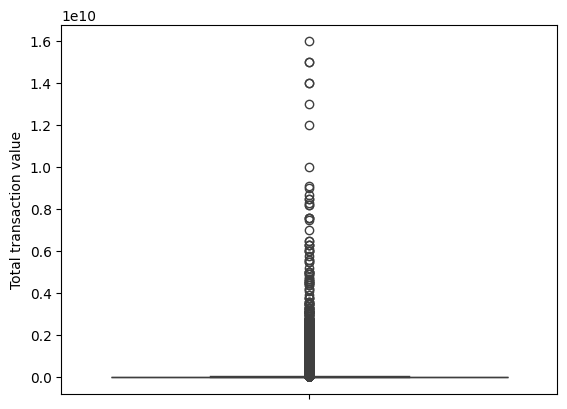

In [67]:
sns.boxplot(data=df, y="Total transaction value")

### Description

The dataset includes a wide range of transaction values, with a **significant presence of high-value transactions**.  
These high prices are not necessarily errors but reflect actual real estate market conditions, especially in urban areas.  

#### Issues with IQR-Based Outlier Removal:
- **Real estate prices follow a right-skewed distribution**  
  - Many legitimate high-value transactions exist, especially in metropolitan areas.
  - The **IQR method (1.5×IQR rule)** assumes a normal-like distribution and may **unfairly remove** high-value properties.
  
- **Loss of important price data**  
  - Applying IQR filtering removed a **large number of high-value transactions**.
  - This led to an **underestimation of actual market prices**, which contradicts the goal of estimating the **true market average**.

- **Regional price variations were not considered**  
  - The IQR method applies a single threshold across all data.
  - Prices in **Tokyo and rural areas differ greatly**, so a **global threshold is inappropriate**.

#### Alternative Approach: Percentile-Based Filtering (1st-99th percentile per prefecture)
To address these issues, outliers were handled using **a percentile-based approach within each prefecture**:
- **Removes extreme values below the 1st percentile and above the 99th percentile per prefecture**.
- **Accounts for regional differences**, ensuring both high-value and low-value transactions are fairly represented.
- **Preserves important market trends** by keeping valid but high-priced transactions in urban areas.

This method allows for a **more reliable estimation of Japan’s average house prices**, minimizing distortion caused by extreme values.


<Axes: ylabel='Total transaction value'>

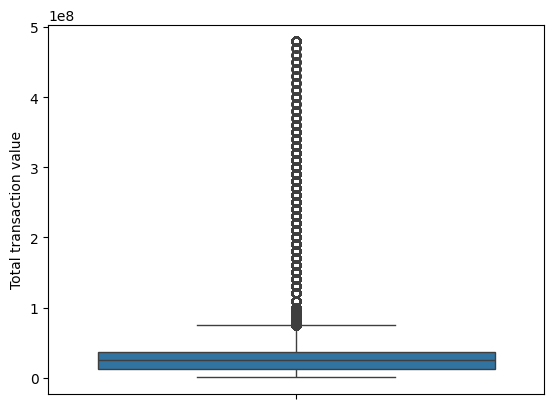

In [68]:
min_thresholds = df.groupby("Prefecture")["Total transaction value"].quantile(0.01)
df = df[df.apply(lambda x: x["Total transaction value"] >= min_thresholds[x["Prefecture"]], axis=1)]

max_thresholds = df.groupby("Prefecture")["Total transaction value"].quantile(0.99)
df["Total transaction value"] = df.apply(lambda x: min(x["Total transaction value"], max_thresholds[x["Prefecture"]]), axis=1)

sns.boxplot(data=df, y="Total transaction value")

## Filtering Transaction Year

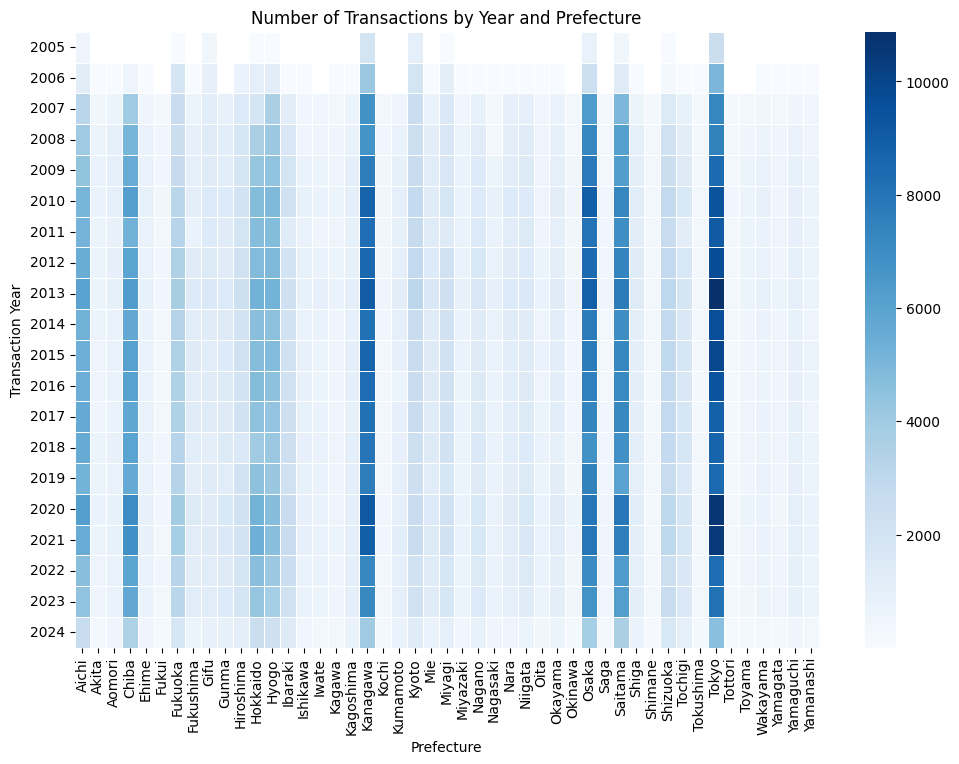

In [69]:
yearly_transaction_counts = df.groupby(["Transaction Year", "Prefecture"]).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(yearly_transaction_counts, cmap="Blues", linewidths=0.5)
plt.xlabel("Prefecture")
plt.ylabel("Transaction Year")
plt.title("Number of Transactions by Year and Prefecture")
plt.show()

### Description

The distribution of transaction counts across different prefectures reveals a significant disparity between urban and rural areas. This trend is not due to biases in data collection but rather reflects the inherent differences in real estate market activity.

- **Urban centers such as Tokyo, Osaka, and Kanagawa** exhibit significantly higher transaction volumes. This is expected due to:
  - Higher population density.
  - Greater demand for residential properties.
  - Increased real estate market liquidity.

- **Rural areas like Tottori, Shimane, and Kochi** show fewer transactions, which aligns with:
  - Lower population density.
  - Reduced demand and slower market turnover.
  - Less frequent property development and sales.

This variation is a natural outcome of market dynamics and does not indicate an issue with data collection. The observed transaction patterns align with expected real estate activity across different regions of Japan.


In [70]:
display(yearly_transaction_counts)

Prefecture,Aichi,Akita,Aomori,Chiba,Ehime,Fukui,Fukuoka,Fukushima,Gifu,Gunma,...,Shizuoka,Tochigi,Tokushima,Tokyo,Tottori,Toyama,Wakayama,Yamagata,Yamaguchi,Yamanashi
Transaction Year,,,,,,,,,,,,,,,,,,,,,
2005,532.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,426.0,NaN,...,1.0,NaN,NaN,2498.0,NaN,NaN,NaN,NaN,NaN,NaN
2006,1190.0,1.0,3.0,563.0,1.0,NaN,1879.0,3.0,910.0,NaN,...,267.0,2.0,1.0,5001.0,NaN,NaN,1.0,1.0,1.0,2.0
2007,3118.0,457.0,616.0,3991.0,532.0,293.0,2560.0,639.0,1197.0,816.0,...,1486.0,876.0,282.0,7292.0,266.0,370.0,427.0,315.0,519.0,406.0
2008,4038.0,634.0,1013.0,5105.0,716.0,402.0,2491.0,931.0,1338.0,1217.0,...,2144.0,1157.0,376.0,7478.0,372.0,517.0,673.0,540.0,772.0,572.0
2009,4389.0,684.0,1020.0,5534.0,803.0,421.0,2693.0,985.0,1332.0,1229.0,...,2505.0,1361.0,299.0,8376.0,370.0,657.0,798.0,558.0,888.0,629.0
2010,5136.0,685.0,1013.0,6170.0,860.0,431.0,3166.0,1125.0,1506.0,1415.0,...,2786.0,1651.0,361.0,9361.0,392.0,633.0,826.0,548.0,915.0,604.0
2011,5144.0,651.0,834.0,5252.0,790.0,380.0,3242.0,705.0,1404.0,1284.0,...,2617.0,1185.0,320.0,9058.0,332.0,605.0,732.0,568.0,906.0,666.0
2012,5494.0,636.0,927.0,5869.0,806.0,412.0,3503.0,1315.0,1446.0,1338.0,...,2828.0,1730.0,340.0,9718.0,337.0,613.0,791.0,559.0,1005.0,627.0
2013,6008.0,663.0,945.0,6293.0,852.0,400.0,3762.0,1410.0,1532.0,1524.0,...,3058.0,1876.0,304.0,10879.0,371.0,658.0,888.0,624.0,993.0,643.0


In [71]:
df_yearly_transactions = df.groupby(["Transaction Year", "Prefecture"]).size().unstack()
df_yearly_transactions = df_yearly_transactions.dropna()

threshold = 200
valid_years = df_yearly_transactions.index[df_yearly_transactions.min(axis=1) >= threshold]
valid_years

Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='Transaction Year')

### Description

To ensure a balance between sufficient data representation and minimizing the impact of long-term market fluctuations, we selected the last five years (2019-2023) for calculating the average transaction value. The following points justify this approach:

1. **Ensuring Sufficient Data Volume**
   - Years with fewer than 200 transactions across all prefectures were excluded to maintain statistical reliability.
   - The 2019-2023 period contains a sufficient number of transactions for meaningful analysis, preventing biases from underrepresented years.

2. **Reflecting Recent Market Trends Without Excessive Volatility**
   - Using a single year might introduce excessive fluctuations due to short-term economic factors, such as the 2020 COVID-19 impact.
   - A 5-year window smooths out short-term price swings while still reflecting current market conditions.

3. **Limiting the Effects of Inflation and Long-Term Land Price Changes**
   - A longer historical period would capture outdated price trends, making the analysis less relevant to current housing market conditions.
   - While inflation and land price variations exist, the impact over a 5-year span is more manageable than over a decade-long period.



In [72]:
df = df[df["Transaction Year"].between(2019, 2023)]
df

,Prefecture,Total transaction value,Use,Building coverage ratio,Floor area ratio,Station Distance Category,Area Category,Land Shape Category,Building Size Category,Building Age Category,Building Structure Simplified,Transaction Year
2092,Hyogo,180000000.0,Housing Complex,80.0,300.0,Moderate,Very Large,Regular,Very Large,Moderate,Concrete,2023
2096,Hyogo,59000000.0,House,60.0,200.0,Close,Medium,Regular,Large,New,Wood,2023
2098,Hyogo,41000000.0,House,60.0,200.0,Moderate,Large,Irregular,Medium,Recent,Wood,2022
2102,Hyogo,54000000.0,House,60.0,200.0,Moderate,Large,Regular,Large,Old,Wood,2022
2103,Hyogo,37000000.0,House,60.0,200.0,Close,Small,Regular,Medium,Moderate,Wood,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
5896650,Yamagata,7000000.0,House,60.0,200.0,Moderate,Very Large,Regular,Large,Recent,Wood,2019
5896651,Yamagata,7000000.0,House,60.0,200.0,Close,Very Large,Irregular,Large,Old,Wood,2019
5896653,Yamagata,950000.0,House,80.0,200.0,Close,Very Large,Regular,Large,NaN,Wood,2019
5896682,Yamagata,4800000.0,House,70.0,200.0,Moderate,Very Large,Irregular,Large,Old,Wood,2023


# Exporting the Processed Dataframe

In [73]:
output_path = "../data/processed/housing_market_japan.csv"
df.to_csv(output_path, index=False, encoding="utf-8")
print(f"Filtered data saved to {output_path}")

Filtered data saved to ../data/processed/housing_market_japan.csv
